# Digital Forensics Assignment 3

 _Code created with assistance from ChatGPT._

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import re

In [2]:
jabberchat_data = pd.read_csv('data/jabber_chat_2021_2022_translated.csv')

## Number of records

In [3]:
num_records = jabberchat_data.shape[0]
print('The number of records in the data is: ' + str(num_records-1))

The number of records in the data is: 60772


## Avarage number of messages per person

In [4]:
message_counts = jabberchat_data['from'].value_counts()
avarage_messages_per_person = message_counts.mean()

In [5]:
print('The avarage number of messages per person: ' + str(avarage_messages_per_person))

The avarage number of messages per person: 221.7992700729927


## Top 10 players

In [6]:
sorted_senders = message_counts.sort_values(ascending=False)
top_players = sorted_senders.head(10)
print('Top Players based on the number of messages sent:')
print(top_players)

Top Players based on the number of messages sent:
from
defender@q3mcco35auwcstmt.onion           8246
stern@q3mcco35auwcstmt.onion              4323
driver@q3mcco35auwcstmt.onion             3968
bio@q3mcco35auwcstmt.onion                3196
mango@q3mcco35auwcstmt.onion              3194
ttrr@conference.q3mcco35auwcstmt.onion    3122
veron@q3mcco35auwcstmt.onion              2955
hof@q3mcco35auwcstmt.onion                2389
bentley@q3mcco35auwcstmt.onion            1810
bloodrush@q3mcco35auwcstmt.onion          1798
Name: count, dtype: int64


## Yahoo accounts

In [7]:
# Concatenate the 'from' and 'to' columns to get all unique email addresses
unique_emails = pd.concat([jabberchat_data['from'], jabberchat_data['to']]).unique()

# Initialize a list to store Yahoo email accounts
yahoo_accounts = []

# Loop through the unique email addresses and filter Yahoo accounts
for email in unique_emails:
    if '@yahoo.com' in email:
        yahoo_accounts.append(email)

# Count the number of @yahoo.com accounts
num_yahoo_accounts = len(yahoo_accounts)

# Print the number of @yahoo.com accounts
print(f'Number of @yahoo.com accounts: {num_yahoo_accounts}')
print('Yahoo accounts:')
for email in yahoo_accounts:
    print(email)

Number of @yahoo.com accounts: 0
Yahoo accounts:


## Gmail accounts

In [8]:
# Create a list to store email addresses from 'from', 'to', 'body', and 'body_en'
email_addresses = []

# Concatenate the 'from', 'to', 'body', and 'body_en' columns to get all unique email addresses
for column in ['from', 'to', 'body', 'body_en']:
    email_addresses.extend(jabberchat_data[column].apply(lambda x: re.findall(r'\b[\w.-]+@[\w.-]+\.\w+\b', str(x))))

# Flatten the list of email addresses
email_addresses = [email for sublist in email_addresses for email in sublist]

# Initialize a list to store Gmail email addresses
gmail_accounts = []

# Loop through the email addresses and filter Gmail accounts
for email in email_addresses:
    if '@gmail.com' in email:
        gmail_accounts.append(email)

# Count the number of Gmail accounts
num_gmail_accounts = len(gmail_accounts)

# Print the number of Gmail accounts
print(f'Number of Gmail accounts: {num_gmail_accounts}')
print('Gmail accounts:')
for email in gmail_accounts:
    print(email)

Number of Gmail accounts: 23
Gmail accounts:
nacho.travesib@gmail.com
basils1991@gmail.com
xvioletta2013@gmail.com
tdemeza@gmail.com
nacho.travesib@gmail.com
basils1991@gmail.com
tdemeza@gmail.com
xvioletta2013@gmail.com
itserviceemilabkarov@gmail.com
nikola131189@gmail.com
loguntsov@gmail.com
nacho.travesib@gmail.com
nacho.travesib@gmail.com
basils1991@gmail.com
xvioletta2013@gmail.com
tdemeza@gmail.com
nacho.travesib@gmail.com
basils1991@gmail.com
tdemeza@gmail.com
xvioletta2013@gmail.com
nikola131189@gmail.com
loguntsov@gmail.com
nacho.travesib@gmail.com


## IP addresses

In [9]:
# Define a function to extract IP addresses from a text
def extract_ip_addresses(text):
    # Regular expression pattern to match IP addresses
    ip_pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'
    return re.findall(ip_pattern, text)

# Create a set to store unique IP addresses
unique_ip_addresses = set()

# Iterate through the 'body_en' column to find IP addresses
for index, row in jabberchat_data.iterrows():
    text = row['body_en']
    ip_addresses = extract_ip_addresses(text)
    if ip_addresses:
        unique_ip_addresses.update(ip_addresses)

# Print the unique IP addresses
for ip in unique_ip_addresses:
    print(f'IP Address: {ip}')

IP Address: 5.2.78.121
IP Address: 193.203.203.101
IP Address: 195.123.228.6
IP Address: 103.226.140.165
IP Address: 91.189.92.38
IP Address: 198.244.194.4
IP Address: 5.181.156.166
IP Address: 204.168.192.36
IP Address: 19.0.192.19
IP Address: 97.77.191.226
IP Address: 91.189.92.19
IP Address: 170.130.55.77
IP Address: 5.141.22.50
IP Address: 4.1.5.3
IP Address: 71.249.104.3
IP Address: 37.235.53.46
IP Address: 72.179.15.202
IP Address: 172.83.155.195
IP Address: 185.232.23.77
IP Address: 185.189.151.142
IP Address: 103.124.106.124
IP Address: 0.73.53.96
IP Address: 194.76.227.29
IP Address: 109.248.15.37
IP Address: 1.1.0.43
IP Address: 186.72.79.132
IP Address: 103.56.207.249
IP Address: 185.25.48.4
IP Address: 198.45.136.28
IP Address: 37.0.8.166
IP Address: 192.39.192.20
IP Address: 198.46.198.128
IP Address: 38.92.191.89
IP Address: 185.158.249.249
IP Address: 37.187.24.215
IP Address: 94.140.115.123
IP Address: 195.123.222.97
IP Address: 67.243.142.225
IP Address: 158.69.133.72


## URL addresses

In [10]:
# Define a function to extract URLs from a text
def extract_urls(text):
    # Regular expression pattern to match URLs
    url_pattern = r'https?://\S+'
    return re.findall(url_pattern, text)

# Create a set to store unique URLs
unique_urls = set()

# Iterate through the 'body_en' column to find URLs
for index, row in jabberchat_data.iterrows():
    text = row['body_en']
    urls = extract_urls(text)
    if urls:
        unique_urls.update(urls)

# Print the unique URLs
for url in unique_urls:
    print(f'URL: {url}')

URL: https://www.ired.team/offensive-security/initial-access/netntlmv2-hash-stealing-using-outlook
URL: https://privatlab.com/s/v/QGbroYpZWRTB4deoZa9X
URL: https://emsonline.tritech.com/vpn/index.html
URL: https://www.signalhire.com/
URL: https://srcdatastorage.z13.
URL: http://root@195.149.87.59/var/www/html/pe_http_111_x64-1637770246-T0Z_64-cr.exe
URL: https://root@195.149.87.59/var/www/html/bec_https_111_x64-1637770033-T12B1Z_64-cr.dll
URL: http://root@195.149.87.59/var/www/html/bec_http_111_x86-1637769971-T0B123Z_32-cr.exe
URL: https://www.sendspace.com/file/p91llb
URL: https://privnote.com/Pvb00gsV#8V9Goriwy
URL: http://root@195.149.87.59/var/www/html/bec_http_111_x64-1637769859-T0B1Z_64-cr.exe
URL: https://privatlab.com/s/v/AEjD45V5OXS4G5oOkrde
URL: http://jkla.com.br/wp-content/a5kV/"
URL: https://1ty.me/Nit6sB4bS
URL: https://qaz.im/index.php?a=delete&amp;q=1446105628
URL: https://qaz.im/load/fnHB9k/B74aDn
URL: http://crdclub4wraumez4.onion/
URL: https://privnote.com/0xYGOLcm#b

In [11]:
# Define a function to extract URLs from a text
def extract_urls(text):
    # Regular expression pattern to match URLs with various prefixes
    url_pattern = r'https?://(?:www\.)?([a-zA-Z0-9.-]+\.[a-z]+)'
    return re.findall(url_pattern, text)

# Create a dictionary to store URL counts
url_counts = {}

# Iterate through the 'body_en' column to find URLs
for index, row in jabberchat_data.iterrows():
    text = row['body_en']
    urls = extract_urls(text)
    if urls:
        for url in urls:
            # Update the count in the dictionary
            if url in url_counts:
                url_counts[url] += 1
            else:
                url_counts[url] = 1

# Sort the dictionary by counts in descending order
sorted_url_counts = sorted(url_counts.items(), key=lambda x: x[1], reverse=True)

# Print the most common URLs
for url, count in sorted_url_counts:
    print(f'URL: {url}, Count: {count}')

URL: privnote.com, Count: 425
URL: qaz.im, Count: 370
URL: privatlab.com, Count: 195
URL: sendspace.com, Count: 45
URL: 1ty.me, Count: 41
URL: file.io, Count: 32
URL: prnt.sc, Count: 29
URL: continewsnv5otx5kaoje7krkto2qbu3gtqef22mnr7eaxw3y6ncz3ad.onion, Count: 28
URL: dropfiles.me, Count: 25
URL: zoominfo.com, Count: 23
URL: youtube.com, Count: 21
URL: l66orrehfw4hovqme625bavlpz7m2achabov3iyqy76cai44oao6neqd.onion, Count: 17
URL: dyncheck.com, Count: 16
URL: temp.sh, Count: 13
URL: shell.com, Count: 11
URL: srcdatastorage.z13.web.core.windows.net, Count: 10
URL: continews.click, Count: 9
URL: dropmefiles.com, Count: 9
URL: my-ppl.com, Count: 9
URL: xssforumv3isucukbxhdhwz67hoa5e2voakcfkuieq4ch257vsburuid.onion, Count: 8
URL: contirec7nchr45rx6ympez5rjldibnqzh7lsa56lvjvaeywhvoj3wad.onion, Count: 7
URL: contirecj4hbzmyzuydyzrvm2c65blmvhoj2cvf25zqj2dwrrqcq5oad.onion, Count: 7
URL: securitylab.ru, Count: 6
URL: carbonblack.com, Count: 6
URL: czb6edlp7gsar4u5crxccldjkjn36p35fro7c7gck7wjumc

## Possible Bitcoin wallets

In [12]:
filtered_messages = []

for message in jabberchat_data['body_en']:
    if ('bitcoin' in message.lower() or 'bitcoins' in message.lower()) and 'wallet' in message.lower():
        filtered_messages.append(message)

# Print the filtered messages with a newline after each message
for message in filtered_messages:
    print(message + '\n')

hello, the cue ball is over, in total 4 new servers, 11 renewals and two vpn subscriptions have been released. two weeks ahead of renewals for $710 in bitcoins 0.022. Please send bitcoins to this wallet bc1qstc4wgx4e2aqm4rtch0sxftr4g7gfq3fg8nwe7 0.022 thanks

hello, the cue ball is over, in total 4 new servers, two vpn subscriptions, and 11 renewals have been released. at the end of the last week green asked to pay for 8 servers for 300 approximately, so ahead of schedule. two weeks ahead of renewals for $700 in cue balls 0.020. please send bitcoins to this wallet 1KBuDgmq8umdoAkdUQLp9YApeHuuKFeUWF 0.020 thanks

hello, the beats are over, a total of 8 new servers, two vpn subscriptions, and 18 renewals have been released. two weeks ahead of renewals for only $ 1240 in bitcoin 0.025 came out earlier due to felipe orders, he needed abuse servers and green sent about 10 addresses to pay. Manuel has now requested two AB licenses. please send bitcoin to this wallet 17mc4Qm7ka9jhQEUB5LTxP3gW

## Possible complaining messages

In [13]:
# Define a list of complaint keywords or phrases
complaint_keywords = ['dissatisfied', 'terrible', 'unacceptable', 'complain', 'problem', 'disappointed', 'frustrated', 'awful', 'mistake', 'angry']

# Create an empty list to store matching messages
complaint_messages = []

# Iterate through the 'body_en' column to find messages containing complaint keywords
for message in jabberchat_data['body_en']:
    if any(keyword in message.lower() for keyword in complaint_keywords):
        complaint_messages.append(message)

# Print the messages containing complaint keywords
for message in complaint_messages:
    print(message + '\n')

[17:03:14]<bob> da v obhem... na tricke vot exe voobhe vse govorayt dirayvoe... dll bolee menee.. no tip noviy proslal ochen rastroen otstykom. only 10-15% doshlo. [17:03:52]<bob> po bk postyanno toje problemi... to vrode sdelaut prokladki, no files palaytsya.. potom delaut file, padaut prokladki...

all adverts complain

only if I&#39;m not mistaken they uploaded the decrypted file and it&#39;s corrupted. but it was kind of like with the .conti extension

I pulled up a team of arbitrageurs, they make traffic globally from fb and google, they have their own loader, but they deal with the crypto theme in general, suggested that they try to work on grids, I say you do traffic, we track networks ourselves, if we share something, and the logs on the crypt and others that arrive - all to them. Should launch next week. Tom also seems to be starting from PND, we provided him with everything he needed. I got an offer from supposedly competitors, crylock partner - they say they broke down there

## Possible messages about money

In [14]:
# Define a list of money-related keywords
money_keywords = ['euro', 'euros', 'dollars', 'dollar', 'million', 'millions', 'thousand', 'thousands', 'hundred', 'hundreds', 'coin', '$', '€', 'currency']

# Create an empty list to store matching messages
money_related_messages = []

# Iterate through the 'body_en' column to find messages containing money keywords
for message in jabberchat_data['body_en']:
    if any(keyword in message.lower() for keyword in money_keywords):
        money_related_messages.append(message)

# Print the messages containing money keywords
for message in money_related_messages:
    print(message + '\n')

bro drop $. Hey

please pay vps. 20$

Has the $500 run out already?

]<derek> DFGR% $ TEwEHYE% S $ R [21:17:11]<derek> https://privatlab.com/s/v/jjojgwD5rpunWJE58mqb [21:17:21]<derek> 80% valid there bro

cB_3NC8v(J$Ef6H

cB_3NC8v(J$Ef6H

cB_3NC8v(J$Ef6H

[05:56:54] <pin> tolko poka ne davai nikuda ia skazhu kogda 
[05:57:51] <pin> i have a client that the TA went dark and need a decryptor.   I have attached a file for you to review.  The address provided by the TA was conti.cont@yandex.ru    Client has paid $5K already.  However, they will pay for the decryptor.   
[05:58:02] <pin> fail s rashireniem babyk 
[05:58:27] <pin> email conti.cont@yandex.ru ne vash?

Today on Kukon, at the time of listing, the price increased from 1.5 dollars to 6532 per coin.

there will be an exchange of its own and you can make coins for teams and a lot of other things

https://trade.kucoin.com/SOLR-USDT

Compared to bitcoin owners whales

therefore, there is a noise, then El Salvador passes the state, th

## Top 10 Languages

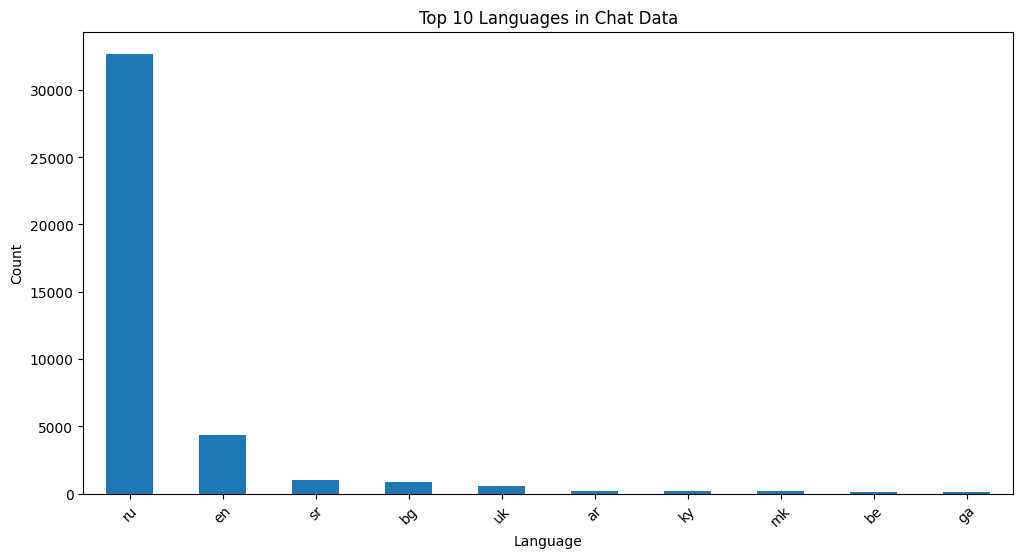

In [15]:
# Get the top 10 languages
top_10_languages = jabberchat_data['body_language'].value_counts().head(10)

# Plot the top 10 languages in a bar chart
plt.figure(figsize=(12, 6))
top_10_languages.plot(kind='bar')
plt.title('Top 10 Languages in Chat Data')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

## User Activity

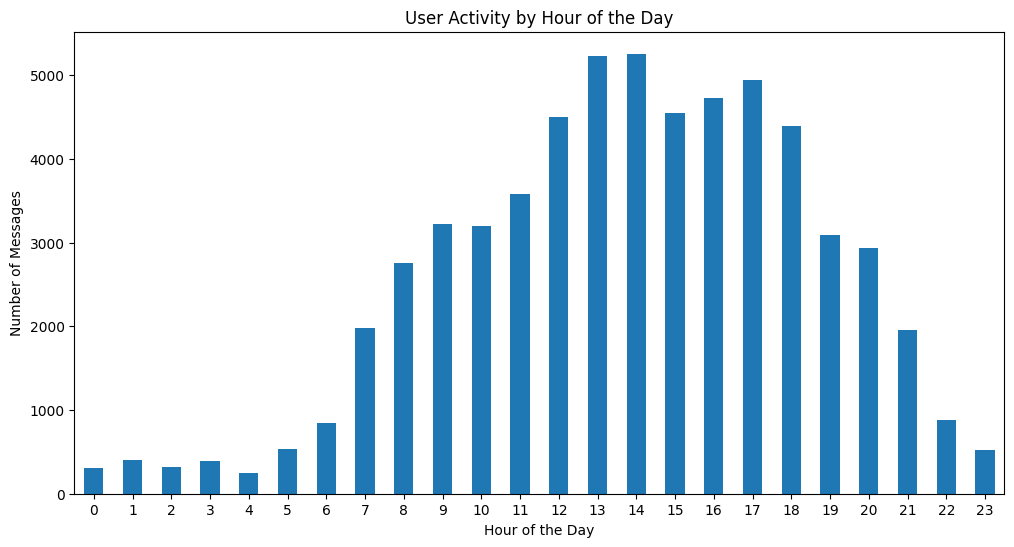

In [16]:
# Convert the 'ts' column to a proper datetime type if it's not already
jabberchat_data['ts'] = pd.to_datetime(jabberchat_data['ts'])

# Extract the hour of the day from the 'ts' column
jabberchat_data['hour'] = jabberchat_data['ts'].dt.hour

# Group the data by hour and count the number of messages in each hour
activity_by_hour = jabberchat_data.groupby('hour').size()

# Plot the activity by hour
plt.figure(figsize=(12, 6))
activity_by_hour.plot(kind='bar')
plt.title('User Activity by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()